In [76]:
%matplotlib notebook

In [77]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [78]:
# Import our data into pandas from CSV
string_thing = '../Resources/trip.csv'
bike_trips_df = pd.read_csv(string_thing, low_memory=False)

bike_trips_df

,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960
1,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970
2,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988
3,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977
4,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971
...,...,...,...,...,...,...,...,...,...,...
286853,8/31/2016 23:45,SEA00201,679.532,Harvard Ave & E Pine St,2nd Ave & Spring St,CH-09,CBD-06,Short-Term Pass Holder,NaN,NaN
286854,9/1/2016 0:20,SEA00247,1965.418,Cal Anderson Park / 11th Ave & Pine St,6th Ave S & S King St,CH-08,ID-04,Short-Term Pass Holder,NaN,NaN
286855,9/1/2016 0:20,SEA00300,1951.173,Cal Anderson Park / 11th Ave & Pine St,6th Ave S & S King St,CH-08,ID-04,Short-Term Pass Holder,NaN,NaN
286856,9/1/2016 0:20,SEA00047,1883.299,Cal Anderson Park / 11th Ave & Pine St,6th Ave S & S King St,CH-08,ID-04,Short-Term Pass Holder,NaN,NaN


In [79]:
# Split up our data into groups based upon 'gender'
gender_groups = bike_trips_df.groupby('gender')

# Find out how many of each gender took bike trips
gender_trips = gender_groups['tripduration'].count()

gender_trips.head(5)

gender
Female       37562
Male        140564
Other         3431
stoptime         1
Name: tripduration, dtype: int64

<IPython.core.display.Javascript object>


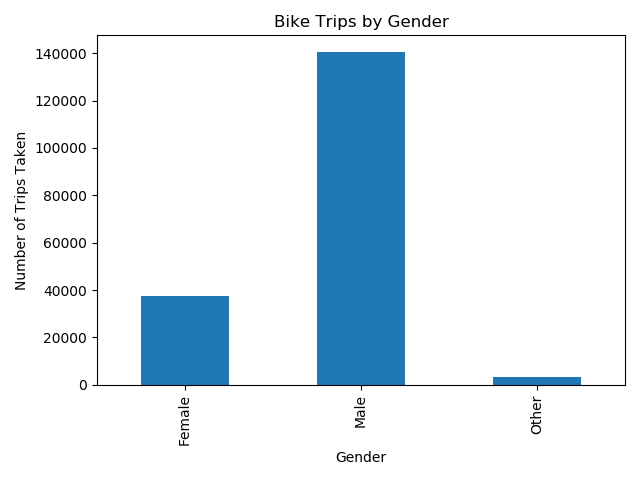

In [80]:
# Drop the 'stoptime' row that is contained within our group
gender_trips = gender_trips.drop(gender_trips.index[3])

# Chart our data, give it a title, and label the axes
gender_chart = gender_trips.plot(kind="bar", title="Bike Trips by Gender")
gender_chart.set_xlabel("Gender")
gender_chart.set_ylabel("Number of Trips Taken")

plt.show()
plt.tight_layout()

In [81]:
# Split up our data into groups based upon 'bikeid' and 'gender'
bike_groups = bike_trips_df.groupby(['bikeid','gender'])

# Create a new variable that holds the sum of our groups
sum_it_up = bike_groups.sum()
sum_it_up.head(12)

tripduration
bikeid   gender              
SEA00001 Female     15876.665
         Male       41150.373
         Other        276.880
SEA00005 Female     20616.240
         Male       60386.328
         Other       1784.955
SEA00006 Female     20071.004
         Male       46584.453
         Other       1469.839
SEA00007 Female      9996.402
         Male       16618.213
         Other       1040.571

<IPython.core.display.Javascript object>


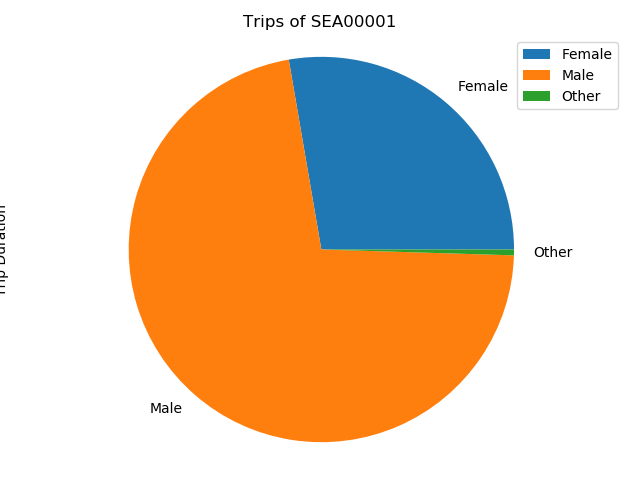

(-1.1147094275724616,
 1.1007004506069709,
 -1.1184745250918073,
 1.1115901234827354)

In [82]:
# Make a variable called bike_id and store a 'bikeid' in it
bike_id = "SEA00001"

# Collect the trips of the 'bikeid' above
just_one_bike = sum_it_up.loc[bike_id]

# Place the gender keys for that single bike into a list
gender_list = just_one_bike.keys()

# Create a pie chart based upon the trip duration of that single bike
bike_pie = just_one_bike.plot(kind="pie", y=gender_list, title=("Trips of " + bike_id))
bike_pie.set_ylabel("Trip Duration")

plt.show()
plt.tight_layout()
plt.axis("equal")

In [83]:
just_one_bike

,tripduration
gender,
Female,15876.665
Male,41150.373
Other,276.880


In [84]:
gender_list

Index(['tripduration'], dtype='object')